In [1]:
"""
You need to run

python run_trained_agents.py \
--has_cuda=0 \
--safe_max_rho 0.2 \
--limit_cs_margin 100. \
--expe_name figure_6 \
--training_iter 1 1000000 2000000 3000000 4000000 5000000 6000000 7000000 8000000 9000000 10000000 \
--nb_process XXX \
--path_agents XXX

and

python run_trained_agents.py \
--has_cuda=0 \
--safe_max_rho 0.5 0.6 0.7 0.8 0.9 0.95 1.0 1.1 1.2 \
--limit_cs_margin 100. \
--expe_name figure_7_1 \
--nb_process XXX \
--path_agents XXX

and

python run_trained_agents.py \
--has_cuda=0 \
--safe_max_rho 1.0 \
--limit_cs_margin 40. 60. 80 100. 120. 140. 160. 180. \
--expe_name figure_7_2 \
--nb_process XXX \
--path_agents XXX

and

python run_trained_agents.py \
--has_cuda=0 \
--safe_max_rho 1.0 \
--limit_cs_margin 60 \
--expe_name figure_8 \
--nb_process XXX \
--path_agents XXX

before this notebook
"""

import matplotlib.pyplot as plt
import json
import os
import numpy as np

In [2]:
def plot_fig(dict_, x_label, path):
    x_plt = sorted(dict_.keys(),
               key=lambda x: float(x))
    x_displ = [float(el) for el in x_plt]
    plt.fill_between(x_displ,
                    y1=[dict_[el][0] for el in x_plt],
                    y2=[dict_[el][4] for el in x_plt],
                    color="cornflowerblue",
                    alpha=0.3
                    )
    plt.fill_between(x_displ,
                    y1=[dict_[el][1] for el in x_plt],
                    y2=[dict_[el][3] for el in x_plt],
                    color="cornflowerblue",
                    alpha=0.7
                    )
    mean_scores = [dict_[el][2] for el in x_plt]
    plt.plot(x_displ,
            mean_scores, 
            color="cornflowerblue")
    plt.axhline(np.max(mean_scores), color='r', linestyle="--", label=f"Max avg. score$={np.max(mean_scores):.2f}$")
    plt.xlabel(x_label)
    plt.ylabel("score on validation scenarios")
    plt.grid()
    plt.legend()
    plt.savefig(path)

### Figure 6

In [ ]:
path = "."
with open (os.path.join(path, "agents_runs_figure_6.json"), "r") as f:
    dict_all_ = json.load(f)

In [ ]:
score_iter = {}
nb_survived_iter = {}
for safe_max_rho_, dict_f in dict_all_.items():
    for limit_cs_margin_, res_margin in dict_f.items(): 
        for training_iter_, res_iter in res_margin.items():
            score_this = []
            nb_survived_this = []
            for weights_dir_str, tmp_res_model in res_iter.items():
                model_nm = os.path.split(os.path.split(weights_dir_str)[0])[1]
                score_this.append(tmp_res_model['score_avg'])
                nb_survived_this.append(tmp_res_model["total_survived"])
            if score_this:
                score_iter[training_iter_] = (np.percentile(score_this, 20),
                                            np.percentile(score_this, 40),
                                            np.percentile(score_this, 50),
                                            np.percentile(score_this, 60),
                                            np.percentile(score_this, 80),
                                            )
            if nb_survived_this:
                nb_survived_iter[training_iter_] = (np.percentile(nb_survived_this, 20),
                                            np.percentile(nb_survived_this, 40),
                                            np.percentile(nb_survived_this, 50),
                                            np.percentile(nb_survived_this, 60),
                                            np.percentile(nb_survived_this, 80),
                                            )

In [ ]:
plot_fig(score_iter, "training iteration", "figure6.pdf")

### Figure 7.1

In [9]:
path = "."
with open (os.path.join(path, "agents_runs_figure_7_1.json"), "r") as f:
    dict_all_ = json.load(f)

In [10]:
score_safe_max_rho = {}
for safe_max_rho_, dict_f in dict_all_.items():
    for limit_cs_margin_, res_margin in dict_f.items():
        for training_iter_, res_iter in res_margin.items():
            score_this = []
            for weights_dir_str, tmp_res_model in res_iter.items():
              score_this.append(tmp_res_model["score_avg"])  
            score_safe_max_rho[safe_max_rho_] = (np.percentile(score_this, 20),
                                              np.percentile(score_this, 40),
                                              np.percentile(score_this, 50),
                                              np.percentile(score_this, 60),
                                              np.percentile(score_this, 80),
                                              )

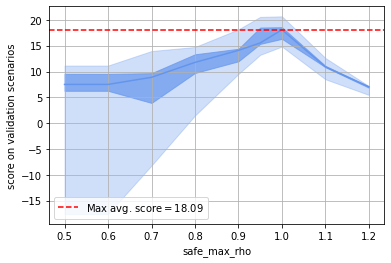

In [11]:
plot_fig(score_safe_max_rho, "safe_max_rho", "figure7_1.pdf")

In [12]:
path = "."
with open (os.path.join(path, "agents_runs_figure_7_2.json"), "r") as f:
    dict_all_ = json.load(f)

In [13]:
score_limit_cs_margin = {}
for safe_max_rho_, dict_f in dict_all_.items():
    for limit_cs_margin_, res_margin in dict_f.items():
        for training_iter_, res_iter in res_margin.items():
            score_this = []
            for weights_dir_str, tmp_res_model in res_iter.items():
              score_this.append(tmp_res_model["score_avg"])  
            score_limit_cs_margin[limit_cs_margin_] = (np.percentile(score_this, 20),
                                              np.percentile(score_this, 40),
                                              np.percentile(score_this, 50),
                                              np.percentile(score_this, 60),
                                              np.percentile(score_this, 80),
                                              )


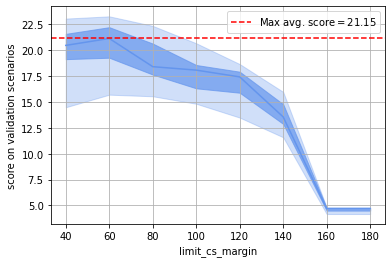

In [14]:
plot_fig(score_limit_cs_margin, "limit_cs_margin", "figure7_2.pdf")